In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

print(tf.__version__)
tf.keras.mixed_precision.set_global_policy('mixed_float16')

2.9.1
INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2070 SUPER, compute capability 7.5


In [2]:
(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
len(train_features), len(train_labels), len(test_features), len(test_labels)

(60000, 60000, 10000, 10000)

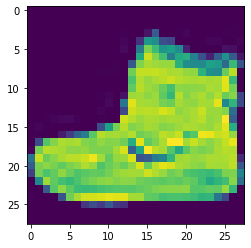

In [3]:
plt.imshow(train_features[0])

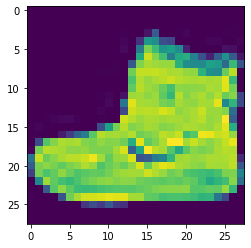

In [4]:
train_features = train_features / 255.0
test_features = test_features / 255.0

plt.imshow(train_features[0])

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-3),
    metrics=['acc'],
)

In [6]:
MODEL_NAME = './models/fmnist_1d_full_verse.h5'
MONITOR = 'val_loss'
BATCH_SIZE = 32
EPOCHS = 70

callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor=MONITOR, factor=0.1, patience=3, min_lr=1e-5)]
callbacks += [tf.keras.callbacks.ModelCheckpoint(MODEL_NAME, monitor=MONITOR, save_best_only=True)]
callbacks += [tf.keras.callbacks.EarlyStopping(monitor=MONITOR, patience=5, restore_best_weights=True)]

history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

Epoch 1/70
1500/1500 [==============================] - 23s 14ms/step - loss: 0.5836 - acc: 0.7990 - val_loss: 0.4216 - val_acc: 0.8481 - lr: 0.0010
Epoch 2/70
1500/1500 [==============================] - 23s 15ms/step - loss: 0.4464 - acc: 0.8422 - val_loss: 0.4221 - val_acc: 0.8433 - lr: 0.0010
Epoch 3/70
1500/1500 [==============================] - 19s 13ms/step - loss: 0.4083 - acc: 0.8554 - val_loss: 0.4074 - val_acc: 0.8477 - lr: 0.0010
Epoch 4/70
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3851 - acc: 0.8627 - val_loss: 0.3707 - val_acc: 0.8666 - lr: 0.0010
Epoch 5/70
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3722 - acc: 0.8658 - val_loss: 0.3829 - val_acc: 0.8645 - lr: 0.0010
Epoch 6/70
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3596 - acc: 0.8704 - val_loss: 0.3744 - val_acc: 0.8639 - lr: 0.0010
Epoch 7/70
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3472 - acc: 0.8742 - val_l

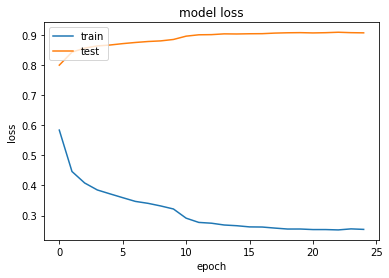

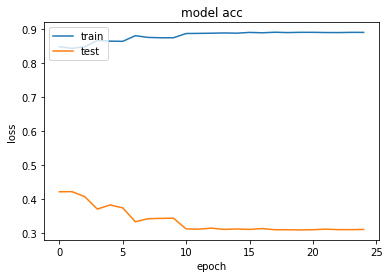

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['val_acc'])
plt.plot(history.history['val_loss'])
plt.title('model acc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
model = tf.keras.models.load_model(MODEL_NAME)
results = model.evaluate(test_features, test_labels, batch_size=BATCH_SIZE)
print(results)

ypred = np.argmax(model.predict(test_features), axis=1)
print(accuracy_score(test_labels, ypred))

313/313 [==============================] - 1s 3ms/step - loss: 0.3408 - acc: 0.8814


[0.3407980501651764, 0.8813897967338562]

313/313 [==============================] - 1s 2ms/step


0.8828